**Исследование компьютерных игр**

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 1. Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
df = pd.read_csv('C:\\Users\\jmilo\\OneDrive\\Рабочий стол\\Яндекс.Практикум\\Сборный проект - 1 (Игры)\\games.csv')

In [3]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** ознакомились с данными. Датасет состоит из 16715 строк и 11 столбцов. Есть пропуски в столбцах Year_of_Release, Critic_Score, User_Score и Rating. Необходимо привести названия всех столбцов к нижнему регистру и заменить тип данных в столбцах Year_of_Release (в тип int) и User_Score (в тип float).

## Шаг 2. Предобработка данных

**Приведем названия столбцов к одному виду (строчные буквы)**

In [5]:
# Переименуем столбцы
df.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
df.head(1) # Проверим

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


**Изменим тип данных**

Так как в столбце year_of_release есть небольшое количество пропусков, просто изменить тип данных не получится. Так как данная информация (год релиза) явялется критичной, а объективно заполнить пропуски не представляется возможным, сначала удалим строки с пропусками, а затем изменим тип данных.

In [6]:
# Удалим пропуски
df = df.dropna(subset=['year_of_release'])

In [7]:
# Проверим
df['year_of_release'].isna().sum()

0

In [8]:
# Меняем тип данных
df['year_of_release'] = df['year_of_release'].astype('int')

Так как в столбце user_score есть значение 'tbd', просто изменить тип данных не получится. Аббревиатура tbd расшифровывается как To Be Determined, то есть "Будет определено". Значит оценка еще не определена. Строки с такой записью можно заменить на NaN и после этого изменить тип данных в столбце user_score на float.

In [9]:
# Заменим tbd на Nan 
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [10]:
# Изменим тип данных
df['user_score'] = df['user_score'].astype('float64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


**Проверим дубликаты**

In [12]:
print(df.duplicated().sum())

0


Дубликатов нет.

**Обработаем пропуски**

In [13]:
pd.DataFrame(round(df.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
user_score,54.600000
critic_score,51.500000
rating,40.600000
name,0.000000
genre,0.000000
platform,0.000000
year_of_release,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


Столбец rating имеет 40,6% пропусков, заменим пропуски на значение "unknown".\
Столбы с оценками пользователей и критиков имеют 51,5% и 54,6% пропусков соответственно. Здесь заменим пропуски на значение-заглушку -1.

In [14]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [15]:
df['user_score'] = df['user_score'].fillna(-1)

In [16]:
# Для начала посмотрим уникальные значения жанров
df['rating'] = df['rating'].fillna('unknown')

In [17]:
# Проверим
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown


In [18]:
# Посмотрим информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


Заменили пропущенные значения в столбцах critic_score и user_score на медианные значения оценки по каждому жанру.

**Посчитаем суммарные продажи во всех регионах**

In [19]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [20]:
df.head() # Проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


## Шаг 3. Исследовательский анализ данных

**Посмотрим сколько игр выпускалось в разные годы**

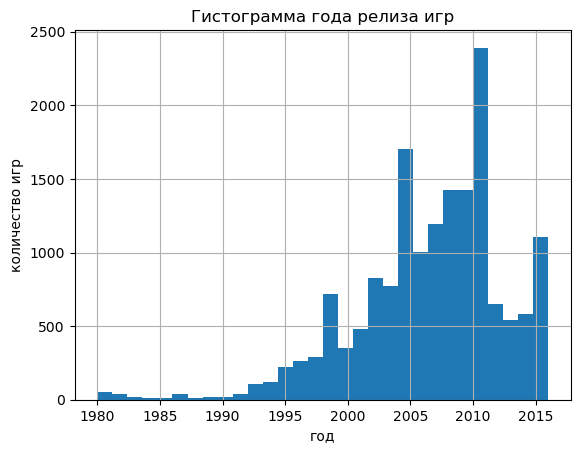

In [21]:
# Построим гистограмму
df.hist('year_of_release', bins=30)
plt.title('Гистограмма года релиза игр')
plt.xlabel('год')
plt.ylabel('количество игр')
plt.show()

In [22]:
# Посмотрим количество выпущенных игр по годам
release_pivot = df.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name', ascending=False)
release_pivot

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


Выпуск игр стал быстро расти после 1994 года. Самое большое количество выпущено в 2008 году, самое меньшее в 1980 году (игры тогда только начали выпускаться). Данные с 1980 по 1993 год не так важны для исследования, так как индустрия в те года только зарождалась...количество игр небольшое и качество несравнимо с современным.

**Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам**

In [23]:
# Создадим сводную таблицу, котрая покажет платформы с наибольшими суммарными продажами
platform_pivot = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
platform_pivot

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Выберем первые 6 платформ с самыми большими продажами (т.к. продажи PS более чем в 2 раза выше, чем продажи PS4)

In [24]:
ps2 = df.query('platform == "PS2"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [25]:
x360 = df.query('platform == "X360"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [26]:
ps3 = df.query('platform == "PS3"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [27]:
wii = df.query('platform == "Wii"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [28]:
ds = df.query('platform == "DS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

In [29]:
ps = df.query('platform == "PS"').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

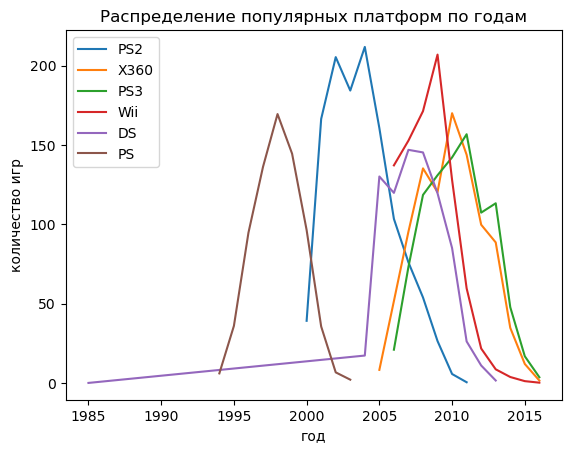

In [30]:
# Построим график, чтобы наглядно оценить продажи платформ по годам
plt.plot(ps2, label='PS2')
plt.plot(x360, label='X360')
plt.plot(ps3, label='PS3')
plt.plot(wii, label='Wii')
plt.plot(ds, label='DS')
plt.plot(ps, label='PS')
plt.title('Распределение популярных платформ по годам')
plt.xlabel('год')
plt.ylabel('количество игр')
plt.legend()
plt.show()

На примере платформы Play Station, исходя из графика, можно сделать вывод, что платформы существуют примерно 10 лет(PS - с 1994 по 2004, PS2 - с 2000 по 2011, PS3 - с 2006 по 2016), новые платформы появляются примерно через 6 лет.

**Выбор актуального периода**

Чтобы задать актуальный период для составления прогноза на 2017 год, учитывая результаты предыдущих шагов, удалим не популярные платформы (с количеством копий меньше 2 млн - PCFX, GG, 3DO, TG16, WS, NG, SCD) и возьмем данные, начиная с 2013 года (за последние 4 года).

In [31]:
# Удаляем ненужные платформы
df_update = df.drop(df[df['platform'].isin(["PCFX", "GG", "3DO", "TG16", "WS", "NG", "SCD"])].index)

In [32]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16415 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16413 non-null  object 
 1   platform         16415 non-null  object 
 2   year_of_release  16415 non-null  int32  
 3   genre            16413 non-null  object 
 4   na_sales         16415 non-null  float64
 5   eu_sales         16415 non-null  float64
 6   jp_sales         16415 non-null  float64
 7   other_sales      16415 non-null  float64
 8   critic_score     16415 non-null  float64
 9   user_score       16415 non-null  float64
 10  rating           16415 non-null  object 
 11  total_sales      16415 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


In [33]:
# Берем период после 2012 года (не изменяя исходную таблицу)
good_df = df_update.query('year_of_release > 2012')

In [34]:
good_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int32  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 218.1+ KB


**Выбор потенциально прибыльных платформ**

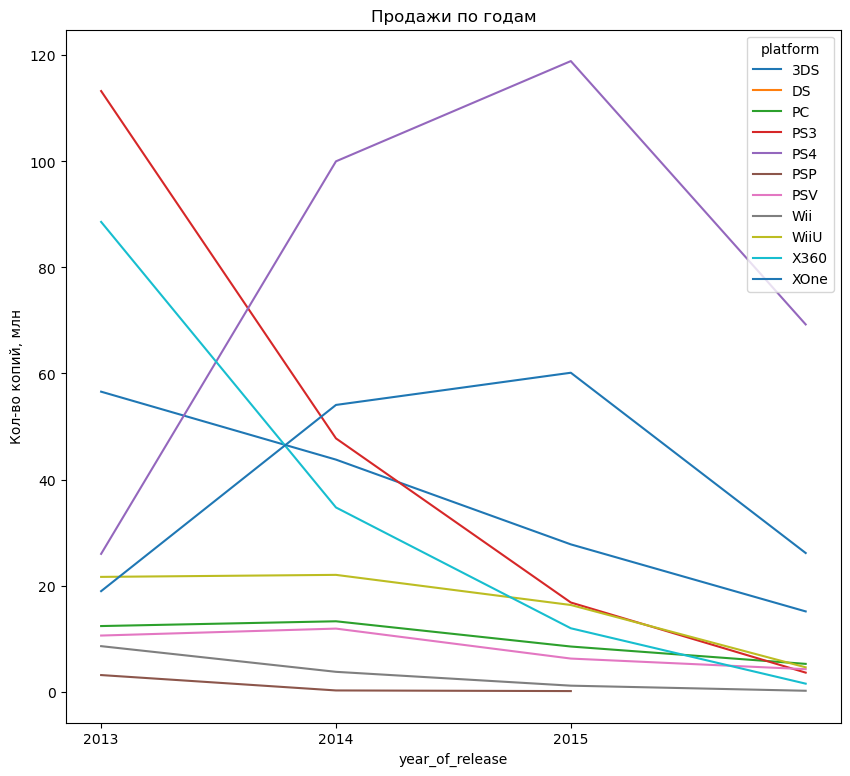

In [35]:
# Создадим сводную таблицу и построим график, который покажет какие платформы лидируют по продажам, растут или падают
good_df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(10,9))
plt.xticks(np.arange(2013, 2016, 1))
plt.title('Продажи по годам')
plt.ylabel('Кол-во копий, млн')
plt.show()

Учитывая, что данные за 2016 год не полные, можно сказать, что перспективных платформ две - это PS4 и Xone (по сравнению с остальными их графики продаж в последние годы растут).

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.**

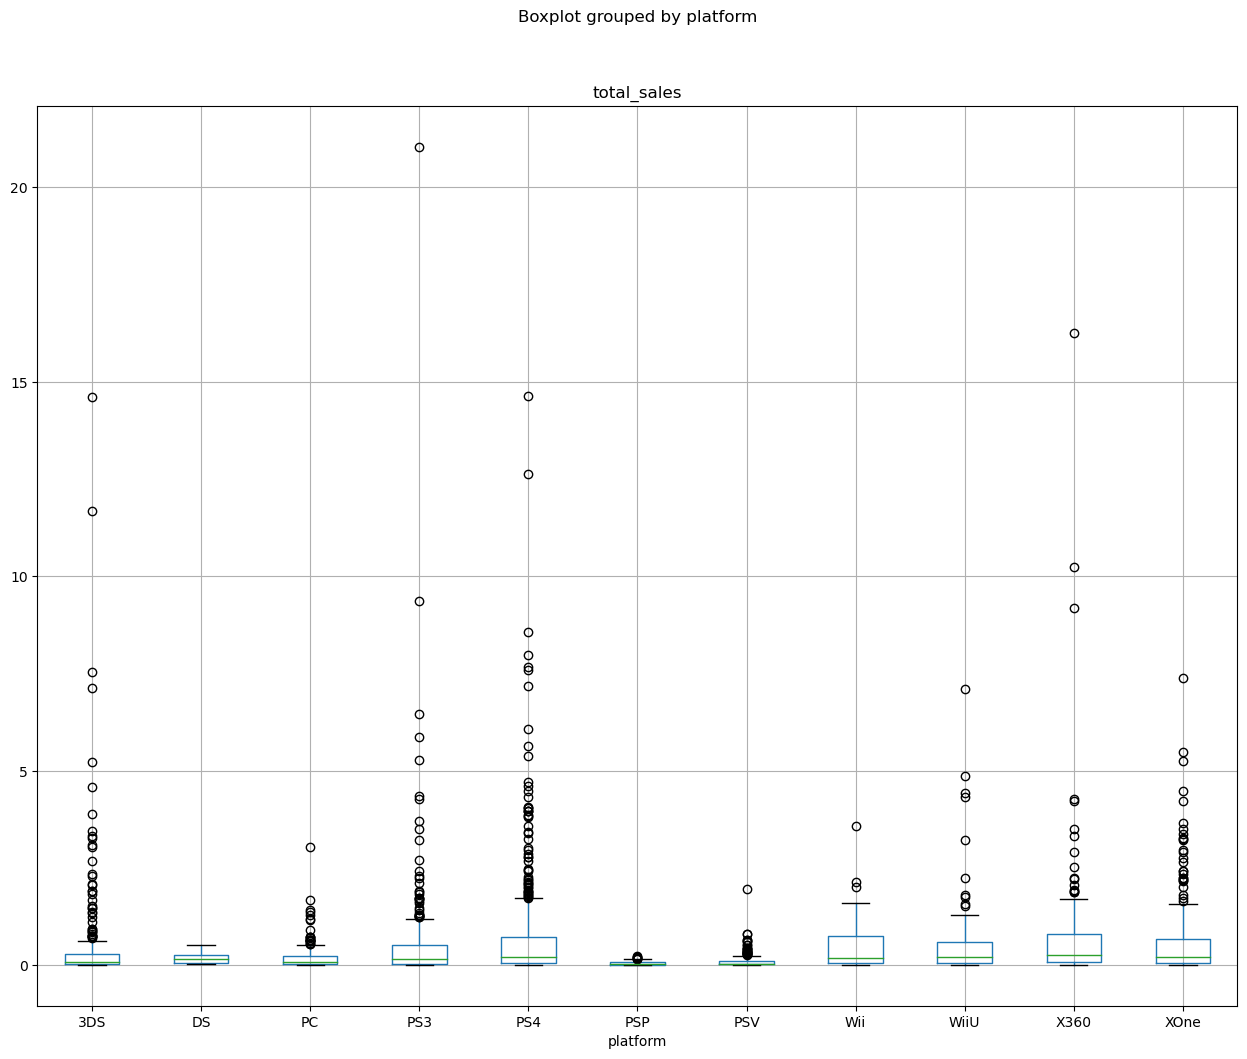

In [36]:
good_df.boxplot(column='total_sales', by='platform', figsize=(15,12));

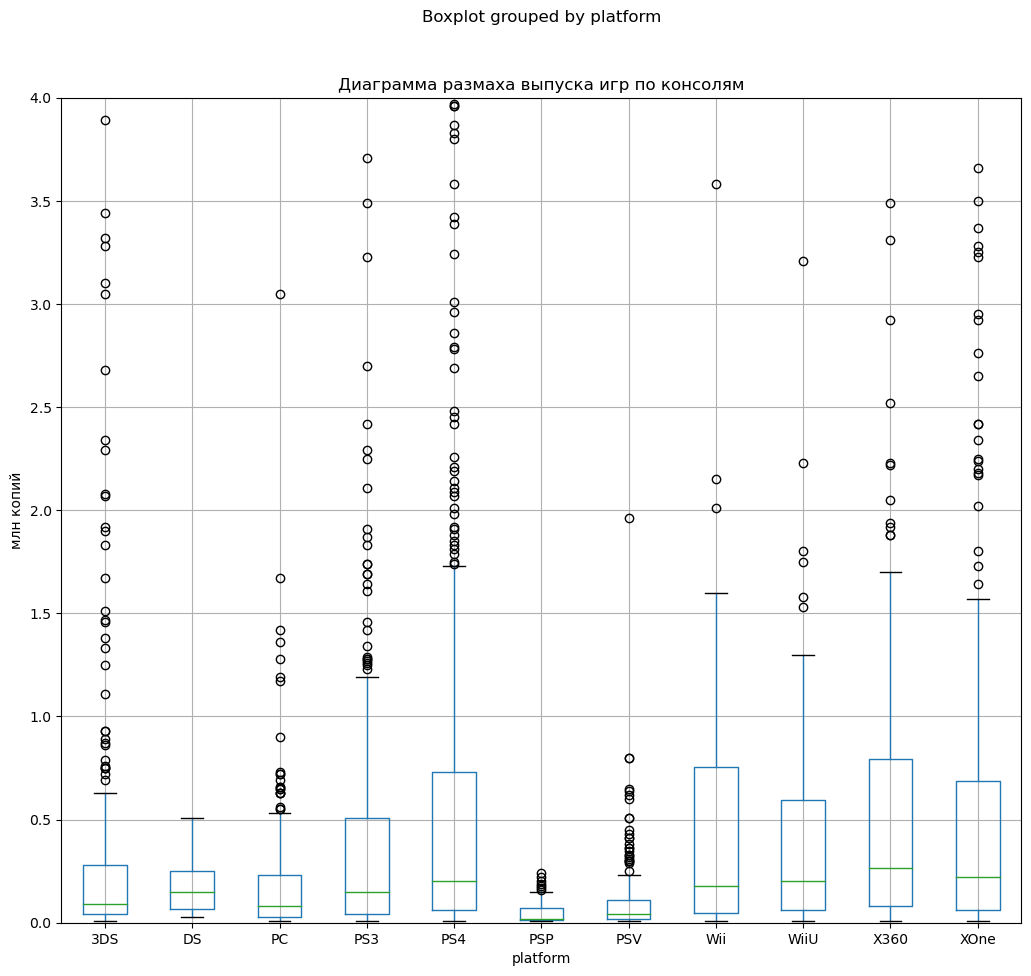

In [37]:
# Для наглядности масштабируем график (ограничим по оси у)
good_df.boxplot(column='total_sales', by='platform', figsize=(12, 11))
plt.ylim(0, 4)
plt.title('Диаграмма размаха выпуска игр по консолям')
plt.ylabel('млн копий')
plt.show()

Глядя на график, можно сделать вывод, что самые популярные консоли - это PS3/PS4 и X360/XOne. Их медианы находятся выше, чем у других платформ, а также они имеют самый большой межквартильный размах, верхняя граница графиков находится выше 1,5 млн копий.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

Для исследования корреляции между отзывами и продажами возьмем платформу PS4.

In [38]:
ps4 = good_df.query('platform == "PS4"')

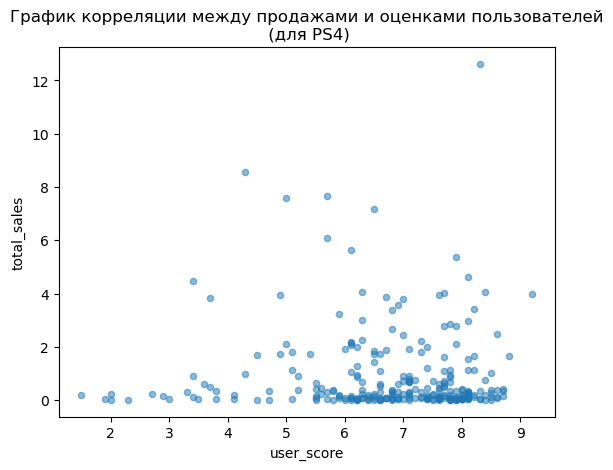

In [39]:
# Построим график корреляции оценок пользователей и продаж
ps4[ps4['user_score'] != -1].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками пользователей\n (для PS4)');

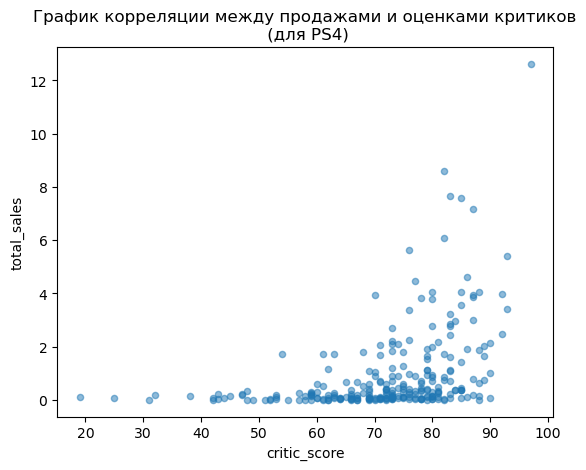

In [40]:
# Построим график корреляции оценок критиков и продаж
ps4[ps4['critic_score'] != -1].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками критиков\n (для PS4)');

In [41]:
print(ps4[(ps4['critic_score'] != -1) & (ps4['user_score'] != -1)]\
      [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

critic_score    0.405895
user_score     -0.033625
total_sales     1.000000
Name: total_sales, dtype: float64


**Вывод:** оценка пользователей практически не влияет на продажи игр (слабая корреляция). Есть небольшая зависимость между оценками критиков и продажами, но существенно повлиять на продажи той или иной игры она вряд-ли сможет.

**Соотнесем выводы из предыдущего шага с продажами игр на других платформах**

Проанализируем корреляцию по другим платформам.

In [42]:
# Платформа 3DS
three_ds = good_df.query('platform == "3DS"')

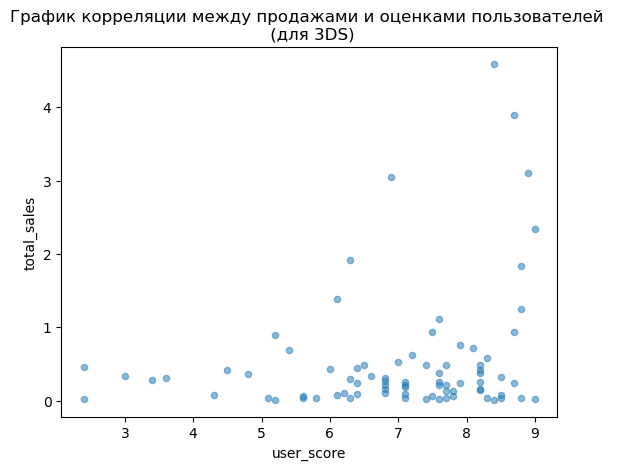

In [43]:
# Построим график корреляции оценок пользователей и продаж
three_ds[three_ds['user_score'] != -1].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками пользователей \n (для 3DS)');

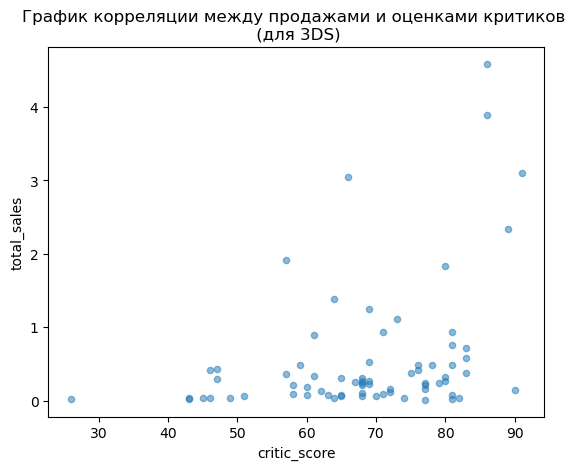

In [44]:
# Построим график корреляции оценок пользователей и продаж
three_ds[three_ds['critic_score'] != -1].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками критиков \n (для 3DS)');

In [45]:
print(three_ds[(three_ds['critic_score'] != -1) & (three_ds['user_score'] != -1)]\
      [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

critic_score    0.339235
user_score      0.272990
total_sales     1.000000
Name: total_sales, dtype: float64


In [46]:
# Платформа DS
ds_new = good_df.query('platform == "DS"')

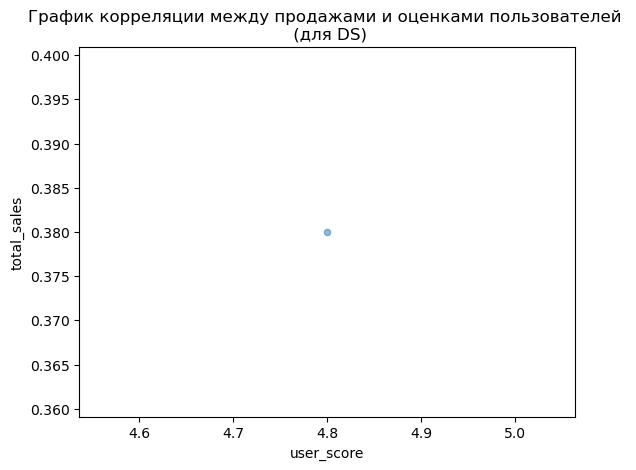

In [47]:
# Построим график корреляции оценок пользователей и продаж
ds_new[ds_new['user_score'] != -1].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками пользователей \n (для DS)');

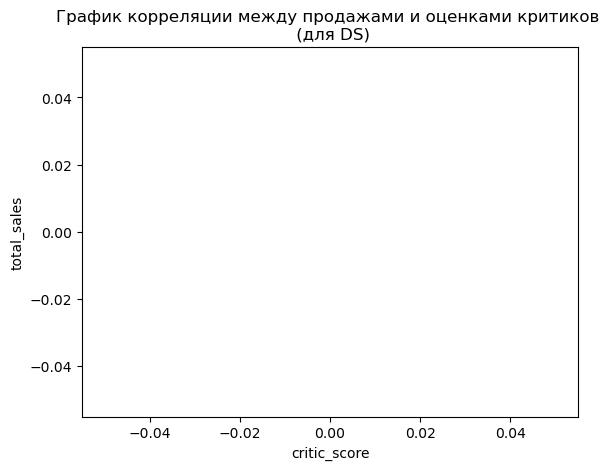

In [48]:
# Построим график корреляции оценок критиков и продаж
ds_new[ds_new['critic_score'] != -1].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками критиков \n (для DS)');

In [49]:
print(ds_new[(ds_new['critic_score'] != -1) & (ds_new['user_score'] != -1)]\
      [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

critic_score   NaN
user_score     NaN
total_sales    NaN
Name: total_sales, dtype: float64


In [50]:
# Платформа PC
pc = good_df.query('platform == "PC"')

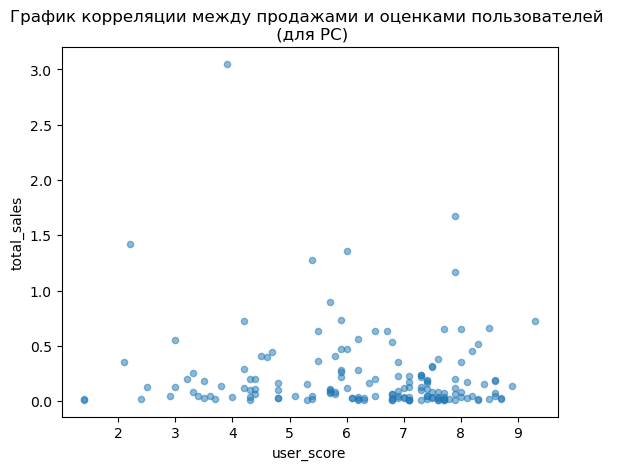

In [51]:
# Построим график корреляции оценок пользователей и продаж
pc[pc['user_score'] != -1].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками пользователей \n (для PC)');

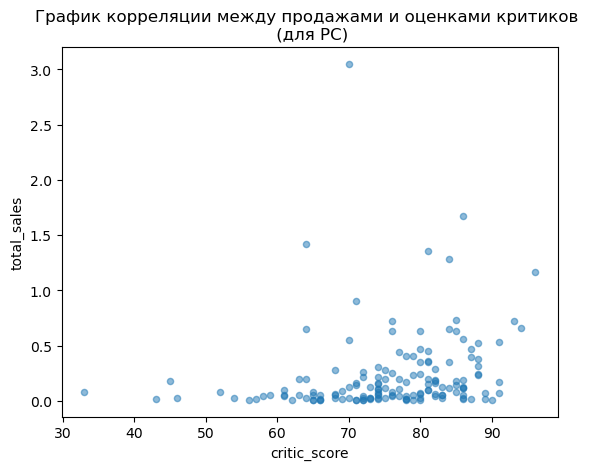

In [52]:
# Построим график корреляции оценок критиков и продаж
pc[pc['critic_score'] != -1].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками критиков \n (для PC)');

In [53]:
print(pc[(pc['critic_score'] != -1) & (pc['user_score'] != -1)]\
      [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

critic_score    0.194124
user_score     -0.109235
total_sales     1.000000
Name: total_sales, dtype: float64


In [54]:
# Платформа PS3
ps3_new = good_df.query('platform == "PS3"')

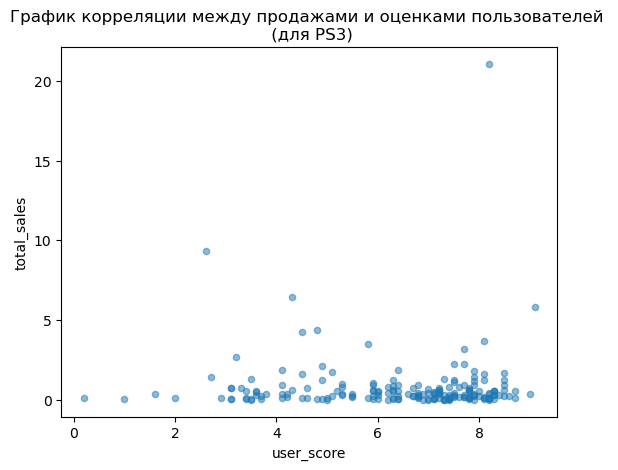

In [55]:
# Построим график корреляции оценок пользователей и продаж
ps3_new[ps3_new['user_score'] != -1].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками пользователей \n (для PS3)');

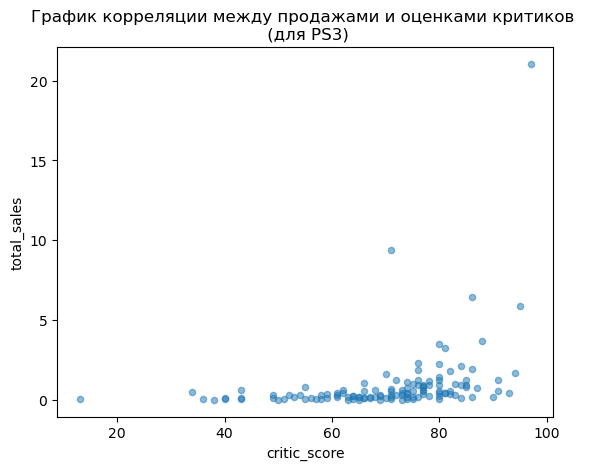

In [56]:
# Построим график корреляции оценок критиков и продаж
ps3_new[ps3_new['critic_score'] != -1].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками критиков \n (для PS3)');

In [57]:
print(ps3_new[(ps3_new['critic_score'] != -1) & (ps3_new['user_score'] != -1)]\
      [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

critic_score    0.333807
user_score      0.022691
total_sales     1.000000
Name: total_sales, dtype: float64


In [58]:
# Платформа PSP
psp = good_df.query('platform == "PSP"')

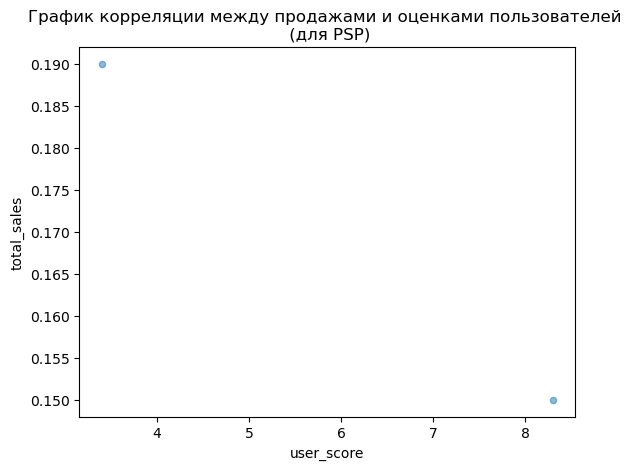

In [59]:
# Построим график корреляции оценок пользователей и продаж
psp[psp['user_score'] != -1].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками пользователей \n (для PSP)');

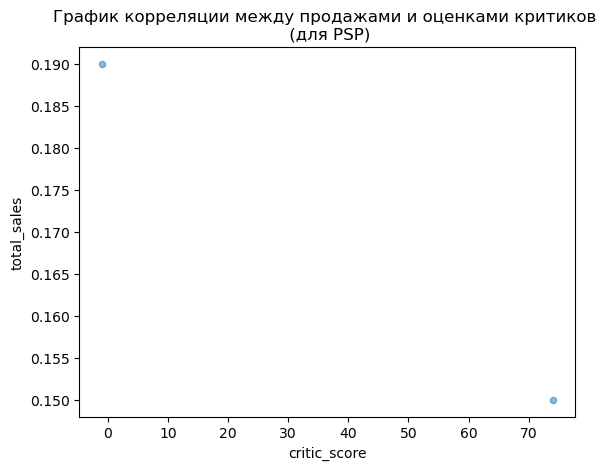

In [60]:
# Построим график корреляции оценок критиков и продаж
psp[psp['user_score'] != -1].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками критиков \n (для PSP)');

In [61]:
print(psp[(psp['critic_score'] != -1) & (psp['user_score'] != -1)]\
      [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

critic_score   NaN
user_score     NaN
total_sales    NaN
Name: total_sales, dtype: float64


In [62]:
# Платформа PSV
psv = good_df.query('platform == "PSV"')

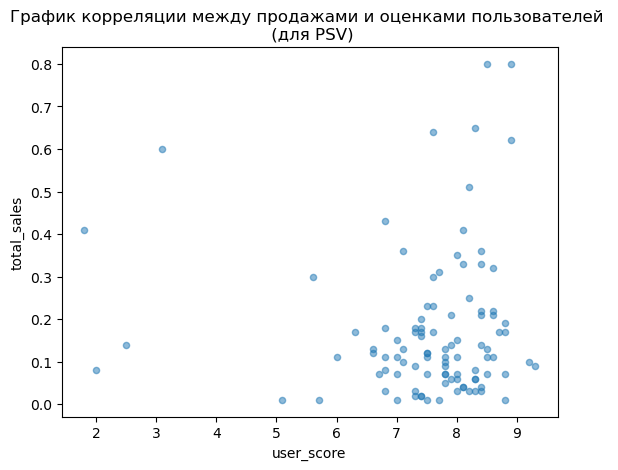

In [63]:
# Построим график корреляции оценок пользователей и продаж
psv[psv['user_score'] != -1].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками пользователей \n (для PSV)');

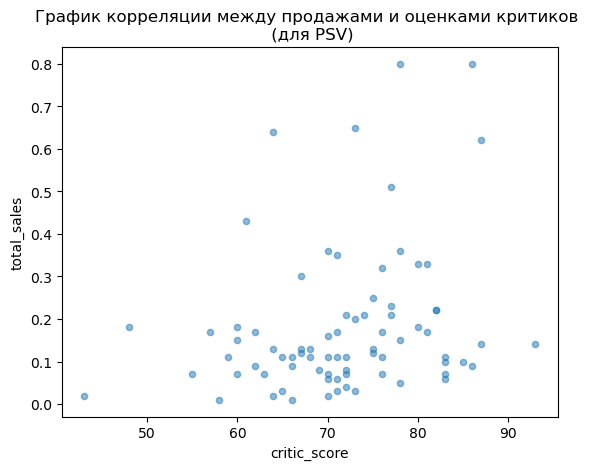

In [64]:
# Построим график корреляции оценок критиков и продаж
psv[psv['critic_score'] != -1].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками критиков \n (для PSV)');

In [65]:
print(psv[(psv['critic_score'] != -1) & (psv['user_score'] != -1)]\
      [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

critic_score    0.254100
user_score      0.265478
total_sales     1.000000
Name: total_sales, dtype: float64


In [66]:
# Платформа Wii
wii_new = good_df.query('platform == "Wii"')

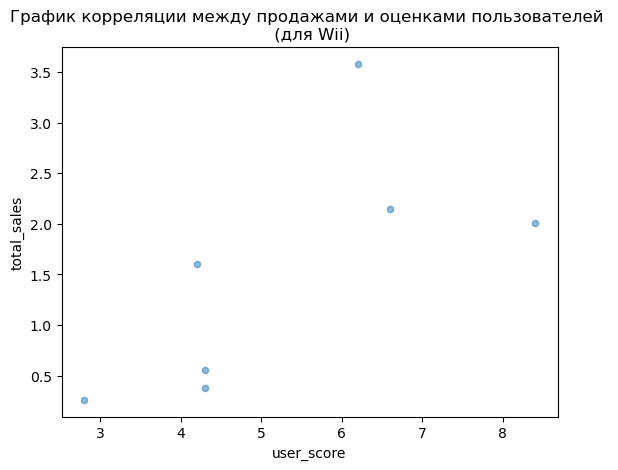

In [67]:
# Построим график корреляции оценок пользователей и продаж
wii_new[wii_new['user_score'] != -1].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками пользователей \n (для Wii)');

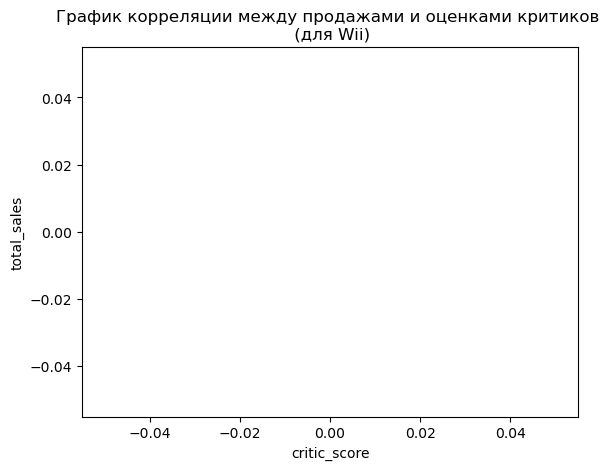

In [68]:
# Построим график корреляции оценок критиков и продаж
wii_new[wii_new['critic_score'] != -1].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками критиков \n (для Wii)');

In [69]:
print(wii_new[(wii_new['critic_score'] != -1) & (wii_new['user_score'] != -1)]\
      [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

critic_score   NaN
user_score     NaN
total_sales    NaN
Name: total_sales, dtype: float64


In [70]:
# Платформа WiiU
wiiu = good_df.query('platform == "WiiU"')

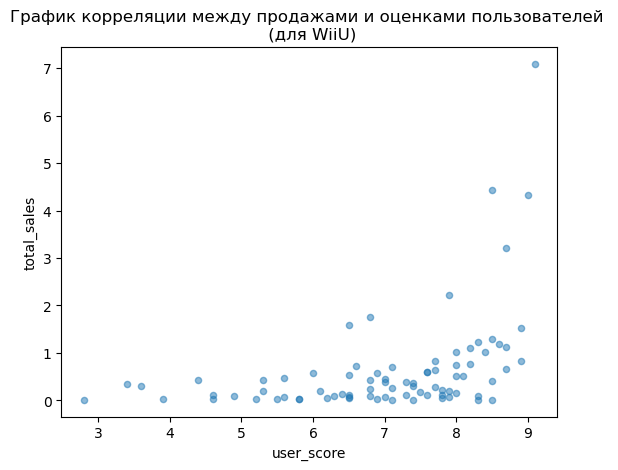

In [71]:
# Построим график корреляции оценок пользователей и продаж
wiiu[wiiu['user_score'] != -1].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками пользователей \n (для WiiU)');

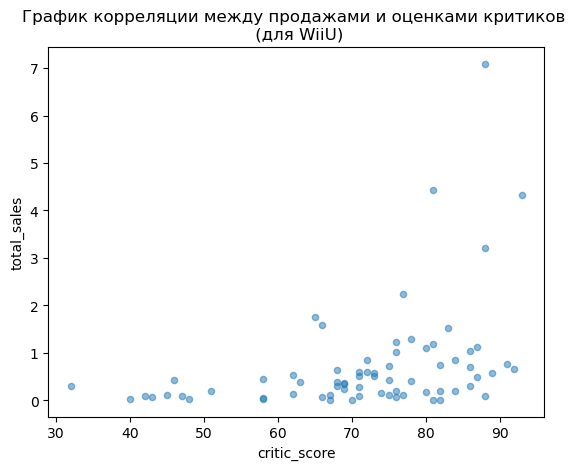

In [72]:
# Построим график корреляции оценок критиков и продаж
wiiu[wiiu['critic_score'] != -1].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками критиков \n (для WiiU)');

In [73]:
print(wiiu[(wiiu['critic_score'] != -1) & (wiiu['user_score'] != -1)]\
      [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

critic_score    0.379504
user_score      0.408692
total_sales     1.000000
Name: total_sales, dtype: float64


In [74]:
# Платформа X360
x360_new = good_df.query('platform == "X360"')

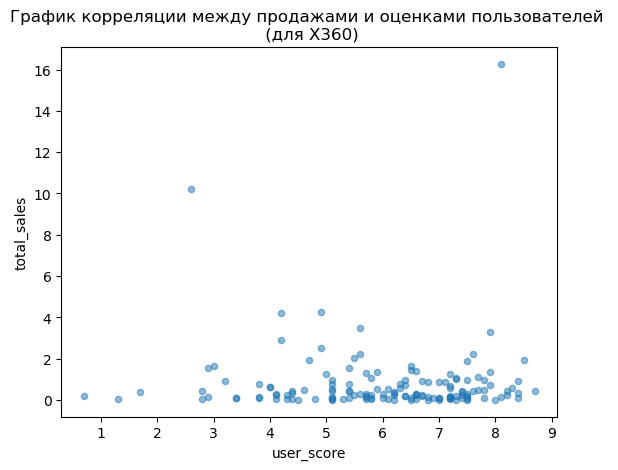

In [75]:
# Построим график корреляции оценок пользователей и продаж
x360_new[x360_new['user_score'] != -1].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками пользователей \n (для X360)');

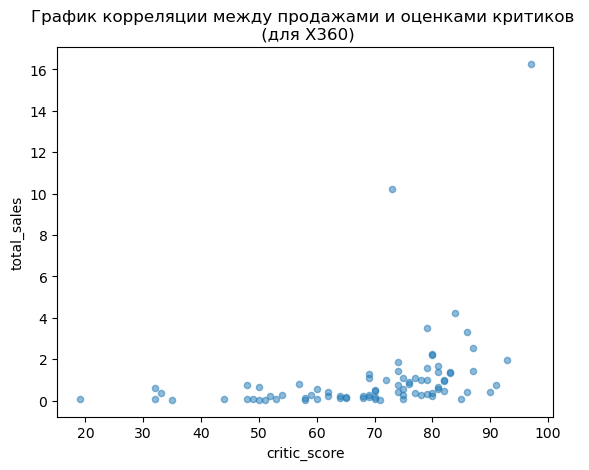

In [76]:
# Построим график корреляции оценок критиков и продаж
x360_new[x360_new['critic_score'] != -1].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками критиков \n (для X360)');

In [77]:
print(x360_new[(x360_new['critic_score'] != -1) & (x360_new['user_score'] != -1)]\
      [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

critic_score    0.350345
user_score     -0.006238
total_sales     1.000000
Name: total_sales, dtype: float64


In [78]:
# Платформа XOne
xone = good_df.query('platform == "XOne"')

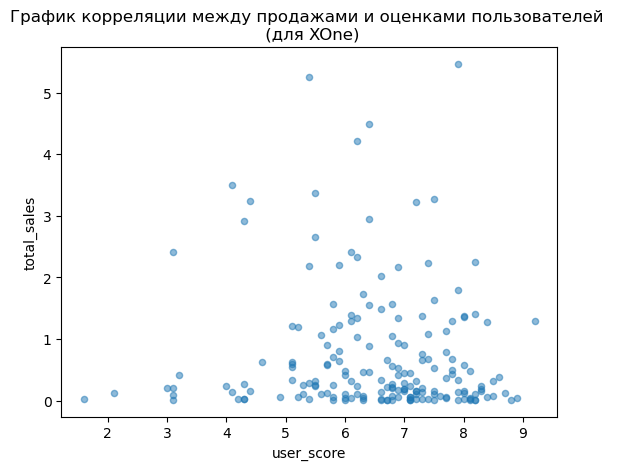

In [79]:
# Построим график корреляции оценок пользователей и продаж
xone[xone['user_score'] != -1].plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками пользователей \n (для XOne)');

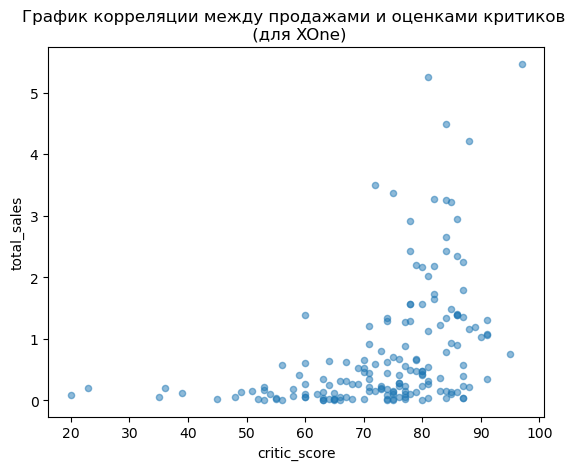

In [80]:
# Построим график корреляции оценок критиков и продаж
xone[xone['critic_score'] != -1].plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('График корреляции между продажами и оценками критиков \n (для XOne)');

In [81]:
print(xone[(xone['critic_score'] != -1) & (xone['user_score'] != -1)]\
      [['critic_score', 'user_score', 'total_sales']].corr()['total_sales'])

critic_score    0.410422
user_score     -0.094003
total_sales     1.000000
Name: total_sales, dtype: float64


**Вывод:** проанализировали корреляцию на других платформах без учета "заглушек" в столбцах с оценками критиков и пользователей. Для платформ DS, PSP, Wii не получилось просчитать корреляцию, т.к. не проставлены оценки. В остальном корреляция на других платформах похожа на корреляцию для PS4. Для платформ WiiU и PSV значения корреляций оценок пользователей и оценок критиков на продажи примерно равны. 

**Посмотрим на общее распределение игр по жанрам.**

In [82]:
genre = good_df.pivot_table(index='genre', values='total_sales', aggfunc={'mean', 'count'}).sort_values(by='mean', ascending=False)
genre.columns = ['count', 'mean_sales']
genre

,count,mean_sales
genre,,
Shooter,187,1.245882
Sports,214,0.703972
Platform,74,0.576081
Role-Playing,292,0.499623
Racing,85,0.469294
Fighting,80,0.441375
Action,766,0.420196
Misc,155,0.405290
Simulation,62,0.350968


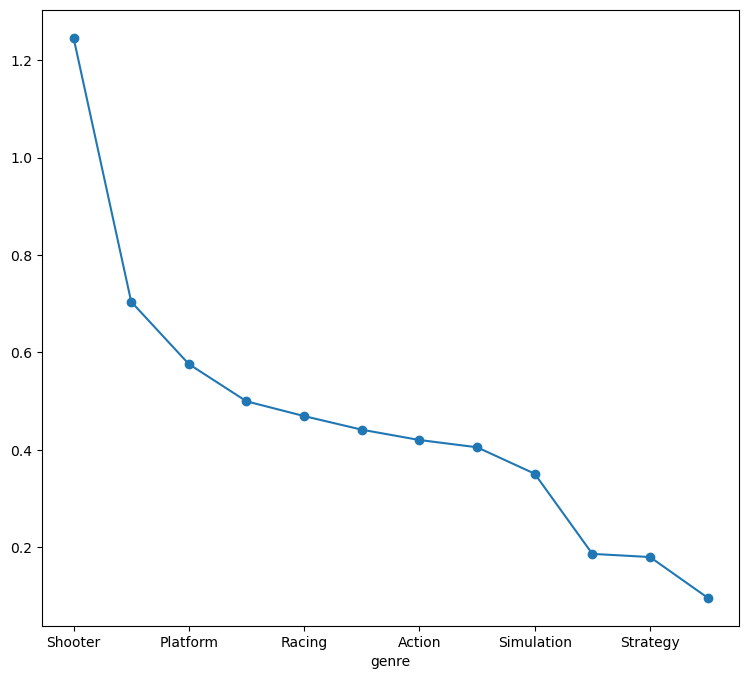

In [83]:
# Посмотрим график средних продаж игр по жанрам
genre['mean_sales'].plot(style='o-', figsize=(9, 8));

Самые высокие средние продажи у игр в жанре Shooter и Sports. Самые низкие средние продажи игр в жанрах Strategy и Adventure.

**Вывод: провели исследовательский анализ данных. Выяснили распределение игр по годам (больше всего игр было реализовано в 2008 году) и жанрам (самый популярный жанр - Shooter), задали актуальный период для анализа (за последние 4 года), выбрали две перспективные платформы (PS4 и Xone). Рассмотрели зависимость продаж от оценок критиков и пользователей (слабая корреляция).**

## Шаг 4. Составим портрет пользователя каждого региона

**Самые популярные платформы (топ-5). Опишим различия в долях продаж.**

In [84]:
# Создаем таблицу с данными продаж по платформам в регионе NA
na = good_df.pivot_table(index='platform', values=['na_sales', 'total_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
na['na_share'] = round((na['na_sales'] / na['total_sales']) * 100, 2) # Считаем долю от мировых продаж
na

,na_sales,total_sales,na_share
platform,,,
PS4,108.74,314.14,34.62
XOne,93.12,159.32,58.45
X360,81.66,136.80,59.69
PS3,63.50,181.43,35.00
3DS,38.20,143.25,26.67


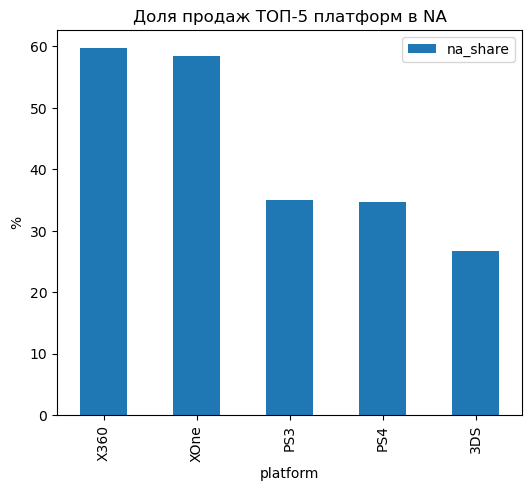

In [85]:
# Визуализируем данные
na.sort_values(by='na_share', ascending=False).plot(kind='bar', y='na_share', style='o', figsize=(6,5))
plt.title('Доля продаж ТОП-5 платформ в NA')
plt.ylabel('%')
plt.show()

In [86]:
# Создаем таблицу с данными продаж по платформам в регионе EU
eu = good_df.pivot_table(index='platform', values=['eu_sales', 'total_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
eu['eu_share'] = round((eu['eu_sales'] / eu['total_sales']) * 100, 2) # Считаем долю от мировых продаж
eu

,eu_sales,total_sales,eu_share
platform,,,
PS4,141.09,314.14,44.91
PS3,67.81,181.43,37.38
XOne,51.59,159.32,32.38
X360,42.52,136.80,31.08
3DS,30.96,143.25,21.61


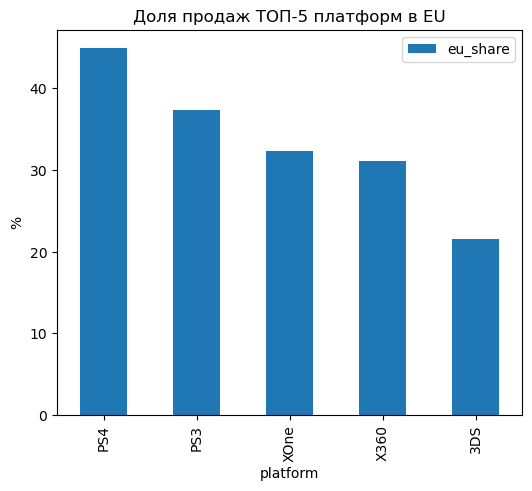

In [87]:
# Визуализируем данные
eu.sort_values(by='eu_share', ascending=False).plot(kind='bar', y='eu_share', style='o', figsize=(6,5))
plt.title('Доля продаж ТОП-5 платформ в EU')
plt.ylabel('%')
plt.show()

In [88]:
# Создаем таблицу с данными продаж по платформам в регионе JP
jp = good_df.pivot_table(index='platform', values=['jp_sales', 'total_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
jp['jp_share'] = round((jp['jp_sales'] / jp['total_sales']) * 100, 2) # Считаем долю от мировых продаж
jp

,jp_sales,total_sales,jp_share
platform,,,
3DS,67.81,143.25,47.34
PS3,23.35,181.43,12.87
PSV,18.59,32.99,56.35
PS4,15.96,314.14,5.08
WiiU,10.88,64.63,16.83


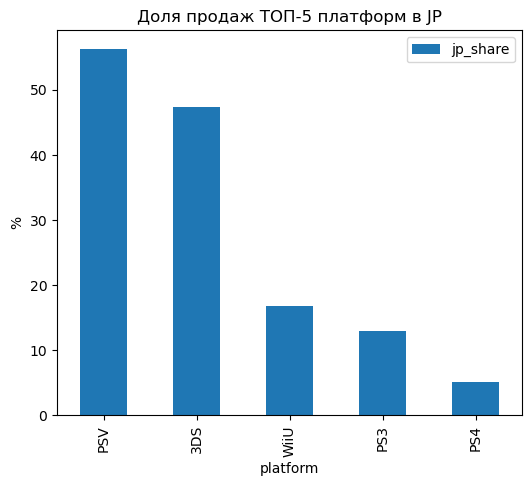

In [89]:
# Визуализируем данные
jp.sort_values(by='jp_share', ascending=False).plot(kind='bar', y='jp_share', style='o', figsize=(6,5))
plt.title('Доля продаж ТОП-5 платформ в JP')
plt.ylabel('%')
plt.show()

**Вывод:** определелили ТОП-5 платформ в каждом регионе.\
В Северной Америке самой популярной платформой является Х360 (59.69% от мировых продаж).\
В Европе самой популярной платформой является PS4 (44.91% от мировых продаж).\
В Японии самой популярной платформой является PSV (56.35% от мировых продаж).

**Самые популярные жанры (топ-5).**

In [90]:
# Создаем сводную таблицу по ТОП-5 жанров в регионе NA
na_genre = good_df.pivot_table(index='genre', values=['na_sales', 'total_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)
na_genre

,na_sales,total_sales
genre,,
Action,126.05,321.87
Shooter,109.74,232.98
Sports,65.27,150.65
Role-Playing,46.40,145.89
Misc,27.49,62.82


In [91]:
# Создаем сводную таблицу по ТОП-5 жанров в регионе EU
eu_genre = good_df.pivot_table(index='genre', values=['eu_sales', 'total_sales'], aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)
eu_genre

,eu_sales,total_sales
genre,,
Action,118.13,321.87
Shooter,87.86,232.98
Sports,60.52,150.65
Role-Playing,36.97,145.89
Racing,20.19,39.89


In [92]:
# Создаем сводную таблицу по ТОП-5 жанров в регионе JP
jp_genre = good_df.pivot_table(index='genre', values=['jp_sales', 'total_sales'], aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)
jp_genre

,jp_sales,total_sales
genre,,
Role-Playing,51.04,145.89
Action,40.49,321.87
Misc,9.20,62.82
Fighting,7.65,35.31
Shooter,6.61,232.98


**Вывод:** в Северной Америке и Европе ТОП-5 жанров имеют одинаковый состав, единственное различие в последнем месте (у европейцев это Racing, в Америке - Misc). Самым популярным жанром в этих регионах является Action.\
Пользователи из Японии больше предпочитают жанр Role-Playing, Action находится на 2-ом месте. Также в этом регионе, в отличие от первых двух, присутствует жанр Fighting.  

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [93]:
# Посмотрим на продажи игр в NA в разбивке по рейтингу ESRB
na_rating = good_df.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_rating

,na_sales
rating,
M,165.21
unknown,89.42
E,79.05
E10+,54.24
T,49.79


In [94]:
# Посмотрим на продажи игр в EU в разбивке по рейтингу ESRB
eu_rating = good_df.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_rating

,eu_sales
rating,
M,145.32
E,83.36
unknown,78.91
E10+,42.69
T,41.95


In [95]:
# Посмотрим на продажи игр в JP в разбивке по рейтингу ESRB
jp_rating = good_df.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_rating

,jp_sales
rating,
unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


**Вывод:** Судя по таблицам в Северной Америке и Европе больше распространены игры с рейтингом М (mature - 'для взрослых'), меньше всего продаж игр в жанре Т (teen - "для подростков").\
В Японии больше всего продаж игр без указания рейтинга, это может быть связано с тем, что здесь популярны игры, которые были выпущены до появления системы ESRB или их еще не успели оценить. 

## Шаг 5. Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Нулевая гипотеза - средние пользовательские рейтинги платформ Xone и PC равны.\
Альтернативная - средние пользовательские рейтинги платформы Xone больше, чем у PC.

In [96]:
user_score_xone = good_df.query('platform == "XOne" & user_score != -1')['user_score'] # Оценки пользователей по платформе XOne

user_score_pc = good_df.query('platform == "PC" & user_score != -1')['user_score'] # Оценки пользователей по платформе PC

alpha = 0.05 # Уровень статистической значимости

results_platform = st.ttest_ind(user_score_xone, user_score_pc, alternative='greater')
print(f'p-value: {results_platform.pvalue}')

# проверяем p-value
if results_platform.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 0.07006329201805823
Нет оснований отвергнуть нулевую гипотезу


Вывод: провели проверку нулевой гипотезы и альтернативной (правосторонней). Для этого задали уровень статистической значимости 5% и сравнили с p-value. Есть основания утверждать, что средние пользовательские рейтинги платформ Xone и PC равны.

**Средние пользовательские рейтинги жанров Action и Sports разные.**

Нулевая гипотеза - средние пользовательские рейтинги жанров Action и Sport равны.\
Альтернативная - средние пользовательские рейтинги жанров Action и Sport не равны.\
В данном случае альтернативная гипотеза двусторонняя.

In [97]:
user_score_action = good_df.query('genre == "Action" & user_score != -1')['user_score'] # Оценки пользователей по жанру Action 

user_score_sports = good_df.query('genre == "Sports" & user_score != -1')['user_score'] # Оценки пользователей по жанру Sports

alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(user_score_action, user_score_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Вывод: полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Можно сказать, что средние пользовательские рейтинги жанров Action и Sports не равны.

**ОБЩИЙ ВЫВОД**\
Проведено исследование данных о продажах компьютерных игр. Была проведена предобработка данных - изменен тип данных в некоторых столбцах, заполнены пропуски, посчитаны общие продажи.\
В ходе исследования использовали данные за актуальный период (с 2013 года), так как более ранние данные могут негативно отразиться на качестве исследования (сменяемость игровых платформ, развитие технологий и тд). Выяснили, что наиболее перспективными являются платформы PS4 и Xone - продажи игр на эти платформы в последние годы растут.\
Увидели, что оценки критиков на продажи мало влияют, а оценки пользователей практически не влияют на продажи. Самыми полпулярными жанрами являются Shooter и Sports.\
Составили портрет пользователя для каждого региона: выявили ТОП-5 платформ и ТОП-5 жанров для каждого региона, оценили влияние рейтинга ESRB на продажи в регионах.\
Выдвинули и проверили несколько гипотез с помощью t-теста.\
Учитывая все выше сказанное, можно сказать, что потенциально популярный продукт для регионов NA и EU - это игры в жанрах Action и Shooter для платформ Xbox и PS4 с возрастным рейтингом "М"; для JP - игры в жанре Role-Playing на PSV.